In [35]:
import requests
import pandas as pd

## Get single item

In [53]:
item_id = '2589'
url     = f'https://api.nexushub.co/wow-classic/v1/item/{item_id}'

r = requests.get(url)
r.json()

{'itemId': 2589,
 'name': 'Linen Cloth',
 'uniqueName': 'linen-cloth',
 'icon': 'https://wow.zamimg.com/images/wow/icons/large/inv_fabric_linen_01.jpg',
 'tags': ['Common', 'Trade Goods'],
 'requiredLevel': 0,
 'itemLevel': 5,
 'sellPrice': 13,
 'vendorPrice': None,
 'tooltip': [{'label': 'Linen Cloth', 'format': 'Common'},
  {'label': 'Item Level 5', 'format': 'Misc'},
  {'label': 'Max Stack: 20'},
  {'label': 'Sell Price:'}],
 'itemLink': '|cffffffff|Hitem:2589::::::::::0|h[Linen Cloth]|h|r'}

In [55]:
server  = 'skeram-horde'
item_id = '2589'
url     = f'https://api.nexushub.co/wow-classic/v1/items/{server}/{item_id}/prices'

r = requests.get(url)
r.json()

{'slug': 'skeram-horde',
 'itemId': 2589,
 'name': 'Linen Cloth',
 'uniqueName': 'linen-cloth',
 'timerange': 7,
 'data': [{'marketValue': 265,
   'minBuyout': 265,
   'quantity': 108,
   'scannedAt': '2020-05-02T01:03:01.000Z'},
  {'marketValue': 70,
   'minBuyout': 70,
   'quantity': 42,
   'scannedAt': '2020-05-02T02:09:53.000Z'},
  {'marketValue': 64,
   'minBuyout': 59,
   'quantity': 368,
   'scannedAt': '2020-05-02T02:47:57.000Z'},
  {'marketValue': 250,
   'minBuyout': 224,
   'quantity': 790,
   'scannedAt': '2020-05-02T03:34:59.000Z'},
  {'marketValue': 214,
   'minBuyout': 214,
   'quantity': 381,
   'scannedAt': '2020-05-02T05:01:16.000Z'},
  {'marketValue': 3500,
   'minBuyout': 192,
   'quantity': 651,
   'scannedAt': '2020-05-02T05:55:08.000Z'},
  {'marketValue': 467,
   'minBuyout': 425,
   'quantity': 1237,
   'scannedAt': '2020-05-02T06:51:03.000Z'},
  {'marketValue': 524,
   'minBuyout': 473,
   'quantity': 880,
   'scannedAt': '2020-05-02T07:28:20.000Z'},
  {'market

## Extract Data into Pandas

In [43]:
df = pd.DataFrame(r.json()['data'])
df.head()

,marketValue,minBuyout,quantity,scannedAt
0,265,265,108,2020-05-02T01:03:01.000Z
1,70,70,42,2020-05-02T02:09:53.000Z
2,64,59,368,2020-05-02T02:47:57.000Z
3,250,224,790,2020-05-02T03:34:59.000Z
4,214,214,381,2020-05-02T05:01:16.000Z


In [44]:
df.dtypes

marketValue     int64
minBuyout       int64
quantity        int64
scannedAt      object
dtype: object

In [56]:
# convert column to datetime
df['scannedAt'] = pd.to_datetime(df['scannedAt'])

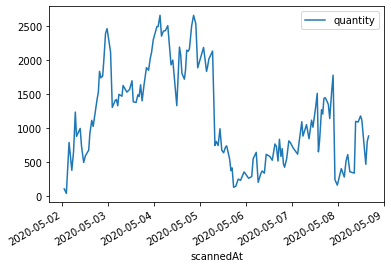

In [57]:
df.plot(x='scannedAt', y='quantity')